<a href="https://colab.research.google.com/github/woodRock/deep-learning-goodfellow/blob/main/chapter_2_linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2

References:
1. Petersen, K. B., & Pedersen, M. S. (2008). The matrix cookbook. Technical University of Denmark, 7(15), 510. Available: https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf

# Scalers, Vectors, Matrices and Tensors

In [ ]:
import numpy as np
import torch

# A scalar is just a single number
scalar = 1

# A vector in an array of numbers.
vector_numpy = np.array([1,2,3,4,5])
vector_torch = torch.tensor([1,2,4,5])

# A matrix in a 2-D array of numbers
matrix_numpy = np.array([[1,2,3],[4,5,6]])
matrix_torch = torch.tensor([[1,2,3],[4,5,6]])

# A_{i,;} denotes a horizontal cross section of a matrix.
print(f"matrix_numpy[0,:] : {matrix_numpy[0,:]}")
print(f"matrix_torch[0,:] : {matrix_torch[0,:]}")

# A_{:,i} denotes the ith column of the matrix.
print(f"matrix_numpy[:,0] : {matrix_numpy[:,0]}")
print(f"matrix_torch[:,0] : {matrix_torch[:,0]}")

# A tensor is an array with more than 2 axes.
tensor_numpy = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
tensor_torch = torch.tensor([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])

# The tranpose of a matrix is the mirror image of the matrix across a diagonal line.
print(f"matrix_numpy.T : {matrix_numpy.T}")
print(f"matrix_torch.T : {matrix_torch.T}")

# We denote the tranpose of a matrix A as A^T, and is defined such that (A^T)_{i,j} = A_{i,j}
print(f"matrix_numpy.T[0][1] == matrix_numpy[1][0]: {matrix_numpy.T[0][1] == matrix_numpy[1][0]}")

# The transpose operator can turn a row matrix into a standard column vector.
print(f" {np.array([[1,2,3]]).T}")

# A scalar can be thought of as a matrix with only a single entry, a scalar is its own transpose a^T = a
print(f"np.array(1).T == np.array(1) : {np.array(1).T == np.array([1])}")

# We allow the addition of a matrix and a vector
A = np.array([[1,2,3],[4,5,6]])
b = np.array([1,2,3])
print(f"A + b : {A + b}")
# The implicit copying for b to many locations is called broadcasting.

matrix_numpy[0,:] : [1 2 3]
matrix_torch[0,:] : tensor([1, 2, 3])
matrix_numpy[:,0] : [1 4]
matrix_torch[:,0] : tensor([1, 4])
matrix_numpy.T : [[1 4]
 [2 5]
 [3 6]]
matrix_torch.T : tensor([[1, 4],
        [2, 5],
        [3, 6]])
matrix_numpy.T[0][1] == matrix_numpy[1][0]: True
 [[1]
 [2]
 [3]]
np.array(1).T == np.array(1) : [ True]
A + b : [[2 4 6]
 [5 7 9]]


# Multiplying Matrices and Vectors

$$
  A ( B + C) = AB + AC \\
  A ( B C ) = (A B) C \\
  A B \ne B A \\
  A.B = B.A
$$

In [ ]:
# Multiplying matrices and vectors
# A must have the same number of column as B has rows.
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
print(f"A @ B : {A @ B}")

# The dot product between two vectors x and y of the same dimensionality is the matrix product x^Ty
x = np.array([1,2,3])
y = np.array([4,5,6])
print(f"np.dot(x,y) == x.T @ y : {np.dot(x,y) == x.T @ y}")

# Matrix prodduct operations have many useful properties.
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
C = np.array([[1,2],[3,4],[5,6]])

# Matrix multiplication is distributive.
print(f"A @ (B + C) == A@B + A@C : {A @ (B + C) == A @ B + A @ C}")

A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
C = np.array([[1,2,3],[4,5,6]])

# Matrix multiplication is associative.
print(f"A @ (B @ C) == (A @ B) @ C : {A @ (B @ C) == (A @ B) @ C}")

A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[9,8,7],[6,5,4],[3,2,1]])

# Matrix multiplication is not commutatuve. AB = BA dies not always hold.
print(f"A @ B == B @ A : {(A @ B == B @ A).all()}")

x = np.array([1,2,3])
y = np.array([4,5,6])

# The dot product between two vectors is commutative.
print(f"np.dot(x,y) == np.dot(y,x) : {np.dot(x,y) == np.dot(y,x)}")
print(f"(x.T @ y).T == x.T @ y : {(x.T @ y).T == x.T @ y}")
print(f"(x.T @ y).T == y.T @ x : {(x.T @ y).T == y.T @ x}")

A @ B : [[22 28]
 [49 64]]
np.dot(x,y) == x.T @ y : True
A @ (B + C) == A@B + A@C : [[ True  True]
 [ True  True]]
A @ (B @ C) == (A @ B) @ C : [[ True  True  True]
 [ True  True  True]]
A @ B == B @ A : False
np.dot(x,y) == np.dot(y,x) : True
(x.T @ y).T == x.T @ y : True
(x.T @ y).T == y.T @ x : True


# Identity and Inverse Matrices

$$
  A^{-1}A = I_n \\  
  Ax = b \\
  A^{-1}Ax = A^{-1}b \\
  I_n x = A^{-1}b \\
  x = A^{-1}b
$$

In [ ]:
# An identidy matrix is a matrix that does not change any vector when we multiply that vector by that matrix.
print(f"Identity matrix - this is I_3: \n{np.eye(3)}")

I = np.eye(3)
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(f"A @ I == A: \n{A @ I == A}")

a = np.array([[1., 2.], [3., 4.]])
a_inv = np.linalg.inv(a)
print(f"np.allclose(a_inv @ a, np.eye(2)) : {np.allclose(a_inv @ a, np.eye(2))}")

Identity matrix - this is I_3: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
A @ I == A: 
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
np.allclose(a_inv @ a, np.eye(2)) : True


In [ ]:
x = np.array([1,2])
b = np.array([5,11])
A = np.array([[1., 2.], [3., 4.]])
a_inv = np.linalg.inv(A)

print(f" A^-1 A = I_n : {np.allclose(a_inv @ a, np.eye(2))}")
print(f" A^-1 A x = A^-1 b : {np.allclose(a_inv @ A @ x, a_inv @ b)}")
print(f"I_n x = A^-1 b : {np.allclose(np.eye(2) @ x, a_inv @ b)}")
print(f"x = A^-1 b : {np.allclose(x, a_inv @ b)}")

 A^-1 A = I_n : True
 A^-1 A x = A^-1 b : True
I_n x = A^-1 b : True
x = A^-1 b : True


# Linear dependence and span

**Span** - the set of all possible vectors you can reach with a linear combination of the orginal vectors.

$ a\vec{v} + b\vec{w} $

**Linear dependence** - one of the vectors can be expressed as a linear combination of the others

$ \vec{u} = a\vec{v} + b\vec{w}$

**Linear independence** - each vector adds another dimension to the span

$ \vec{u} \ne a\vec{v} + b\vec{w}$

The **basis** of a vector psace is a set of linearly independent vectors that span the full space.

3Blue1Brown - Linear combinations, span, and basis vectors | Chapter 2, Essence of linear algebra - https://www.youtube.com/watch?v=k7RM-ot2NWY

In [ ]:
import numpy as np

# Create three vectors
v1 = np.array([1, 2, 3])
v2 = np.array([2, 4, 6])
v3 = np.array([3, 1, 2])

# Check if v2 is a linear combination of v1
scalar = 2
print(v1 * scalar == v2)  # [

[ True  True  True]


Vectors are linearly independent if none of them can be expressed as a linear combination of the others. Let's check our set of vectors:

In [ ]:
# Create a matrix from our vectors
A = np.array([v1, v2, v3])

# Check the rank of the matrix
rank = np.linalg.matrix_rank(A)
print(f"Rank: {rank}")
print(f"Number of vectors: {A.shape[0]}")

Rank: 2
Number of vectors: 3


If the rank equals the number of vectors, they are linearly independent. If not, they are linearly dependent.

The span of a set of vectors is the set of all possible linear combinations of those vectors. It represents the subspace that can be created using these vectors.
Let's create a function to visualize the span of two 2D vectors:


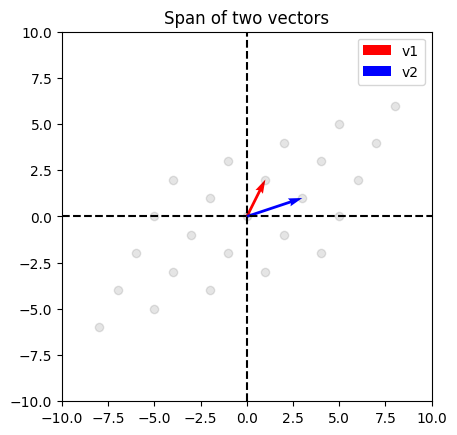

In [ ]:
import matplotlib.pyplot as plt

def plot_span(v1, v2):
    fig, ax = plt.subplots()

    # Plot original vectors
    ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
    ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2')

    # Plot span
    for t1 in np.linspace(-2, 2, 5):
        for t2 in np.linspace(-2, 2, 5):
            v = t1*v1 + t2*v2
            ax.plot(v[0], v[1], 'ko', alpha=0.1)

    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.axhline(y=0, color='k', linestyle='--')
    ax.axvline(x=0, color='k', linestyle='--')
    ax.set_aspect('equal')
    ax.legend()
    plt.title("Span of two vectors")
    plt.show()

# Example usage
v1 = np.array([1, 2])
v2 = np.array([3, 1])
plot_span(v1, v2)

Here is an example in 3d

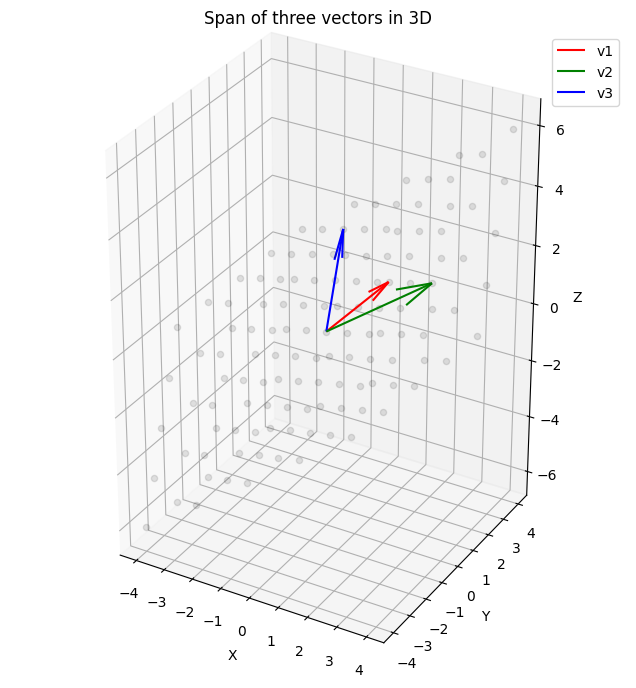

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_span(v1, v2, v3):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot original vectors
    ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='r', label='v1')
    ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='g', label='v2')
    ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], color='b', label='v3')

    # Plot span
    for t1 in np.linspace(-1, 1, 5):
        for t2 in np.linspace(-1, 1, 5):
            for t3 in np.linspace(-1, 1, 5):
                v = t1*v1 + t2*v2 + t3*v3
                ax.scatter(v[0], v[1], v[2], color='k', alpha=0.1)

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Span of three vectors in 3D")

    # Set equal aspect ratio
    max_range = np.array([ax.get_xlim(), ax.get_ylim(), ax.get_zlim()]).T
    ax.set_box_aspect((max_range[1]-max_range[0]).tolist())

    ax.legend()
    plt.show()

# Example usage
v1 = np.array([1, 2, 1])
v2 = np.array([3, 1, 2])
v3 = np.array([0, 1, 3])

plot_3d_span(v1, v2, v3)

Here is an example where C is linearly dependent on A and B. The span all possible combinations of A, B, C in $\mathbb{R}^m$ is $\mathbb{R}^2$.

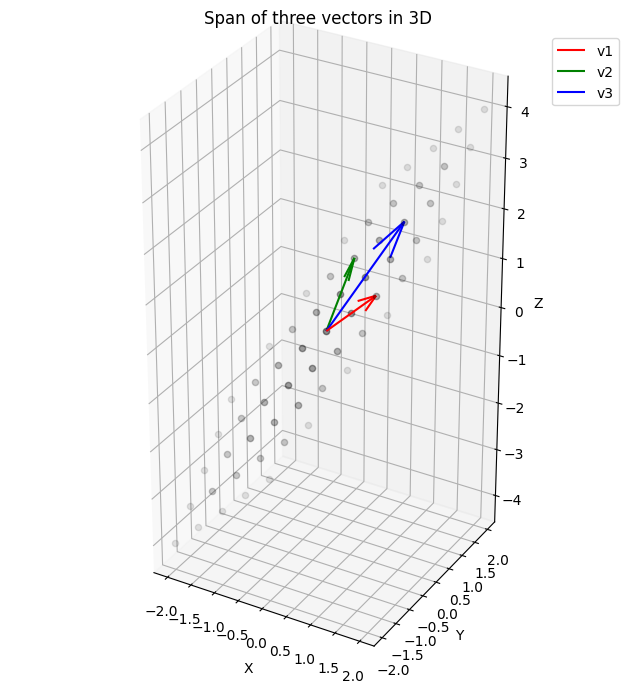

In [ ]:
# Example usage with vectors forming a plane
A = np.array([1, 0, 1])
B = np.array([0, 1, 1])
C = np.array([1, 1, 2])  # v3 = v1 + v2

plot_3d_span(A, B, C)

For the inverse of a matrix to exist, the matrix must be **square**, that is we require that $m = n$, and that all the columns are linearly independent.

A square matrix with linearly dependent columns is known as **singular**.

Matrix A:
[[1 2 3]
 [4 5 6]
 [2 4 6]]

Determinant of A: 0.0
Rank of A: 2
A is singular and does not have an inverse.


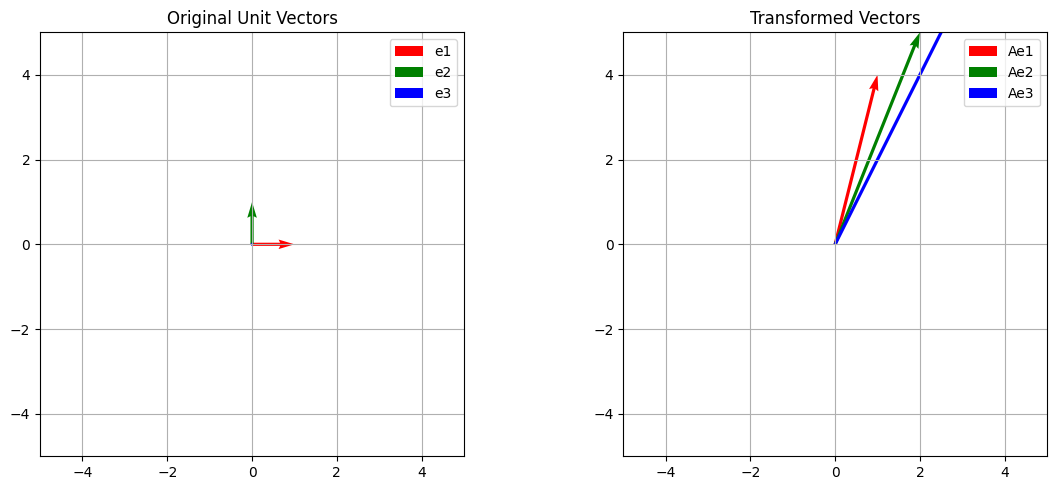

In [ ]:
import numpy as np

# Create a singular matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [2, 4, 6]])

print("Matrix A:")
print(A)

# The determinant should be very close to zero
# (it might not be exactly zero due to floating-point arithmetic).
det_A = np.linalg.det(A)
print(f"\nDeterminant of A: {det_A}")

# The rank will be less than the size of the matrix (which is 3x3).
rank_A = np.linalg.matrix_rank(A)
print(f"Rank of A: {rank_A}")

# This should raise a LinAlgError because the matrix is singular and doesn't have an inverse.
try:
    inv_A = np.linalg.inv(A)
    print("Inverse of A:")
    print(inv_A)
except np.linalg.LinAlgError:
    print("A is singular and does not have an inverse.")

# Visualizing linear dependence:
# We can visualize how this matrix transforms space by applying it to a set of unit vectors:
import matplotlib.pyplot as plt

def plot_transformation(A):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Unit vectors
    e1 = np.array([1, 0, 0])
    e2 = np.array([0, 1, 0])
    e3 = np.array([0, 0, 1])

    # Plot original unit vectors
    ax1.quiver(0, 0, e1[0], e1[1], angles='xy', scale_units='xy', scale=1, color='r', label='e1')
    ax1.quiver(0, 0, e2[0], e2[1], angles='xy', scale_units='xy', scale=1, color='g', label='e2')
    ax1.quiver(0, 0, e3[0], e3[1], angles='xy', scale_units='xy', scale=1, color='b', label='e3')

    # Transform vectors
    t1 = A @ e1
    t2 = A @ e2
    t3 = A @ e3

    # Plot transformed vectors
    ax2.quiver(0, 0, t1[0], t1[1], angles='xy', scale_units='xy', scale=1, color='r', label='Ae1')
    ax2.quiver(0, 0, t2[0], t2[1], angles='xy', scale_units='xy', scale=1, color='g', label='Ae2')
    ax2.quiver(0, 0, t3[0], t3[1], angles='xy', scale_units='xy', scale=1, color='b', label='Ae3')

    for ax in (ax1, ax2):
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.set_aspect('equal')
        ax.legend()
        ax.grid(True)

    ax1.set_title("Original Unit Vectors")
    ax2.set_title("Transformed Vectors")
    plt.tight_layout()
    plt.show()

plot_transformation(A)

So far we have dicussed matrix inverses as being multiplied on the left. It is also possible to define an inverse that is multiplied on the right.

$AA^{-1} = I$

In [ ]:
# A matrix with an inverse
A = np.array([[1, 2],
              [3, 4]])
A_inv = np.linalg.inv(A)
print(f"AA^-1 = I {np.allclose(A @ A_inv, np.eye(2))}")

AA^-1 = I True


# Norms

Norms including the $L^P$ norm are functions mapping vectors to non-negative values.

$ L^P = ||x||_p = (\sum_i |x_i|^p)^{\frac{1}{p}}$

The $L^2$ norm is known as the Euclidean norm, which is simply the Euclidean distance from the origin to the point identified by $x$.

The squared $L_2$ norm is a commonly used to measure the size of a vector which can be calculated simply by $x^Tx$.

The $L^1$ nrom is commonly used in machine learning when the differene between zero and nonzero elements is very important. Every time an element of $x$ moves away from 0 by $\epsilon$, the $L^1$ norm increases by $\epsilon$.

The dot product of two vectors can be rewritten in terms of norms. Specifically,

$$
  x^Ty = ||x||_2||y||_2 \cos \theta
$$

In [ ]:
import numpy as np

def l1_norm(x):
    """Calculate L¹ norm (Manhattan norm)"""
    return np.sum(np.abs(x))

def l2_norm(x):
    """Calculate L² norm (Euclidean norm)"""
    return np.sqrt(np.sum(np.square(x)))

def max_norm(x):
    """Calculate max norm (infinity norm)"""
    return np.max(np.abs(x))

def frobenius_norm(x):
    """Calculate Frobenius norm"""
    return np.sqrt(np.sum(np.square(np.abs(x))))

# Example usage for vectors
v = np.array([1, -2, 3, -4, 5])
print("Vector:", v)
print("L¹ norm:", l1_norm(v))
print("L² norm:", l2_norm(v))
print("Max norm:", max_norm(v))
print("Frobenius norm:", frobenius_norm(v))

print("\n")

# Example usage for matrices
M = np.array([[1, -2, 3], [4, -5, 6], [-7, 8, -9]])
print("Matrix:")
print(M)
print("L¹ norm:", l1_norm(M))
print("L² norm:", l2_norm(M))
print("Max norm:", max_norm(M))
print("Frobenius norm:", frobenius_norm(M))

Vector: [ 1 -2  3 -4  5]
L¹ norm: 15
L² norm: 7.416198487095663
Max norm: 5
Frobenius norm: 7.416198487095663


Matrix:
[[ 1 -2  3]
 [ 4 -5  6]
 [-7  8 -9]]
L¹ norm: 45
L² norm: 16.881943016134134
Max norm: 9
Frobenius norm: 16.881943016134134


# Special Kinds of Matrices and Vectors

**Diagonal** matrices consist on mostly zeroes and ahve nonzero enries only along the main diagonal.

A **symmetric** matrix is any matrix that is equal to its own transpose.

$ A = A^T$

A **unit vector** is a vector with **unit norm**

$ ||x||_2 = 1 $

A vector $x$ and a vector $y$ are **orthongal** to each other if $x^Ty = 0$. IF both vectors have nonzeronrom, this means they are at 90 degree angle to eachother.


If vectors are not only orthogonal but also have unit norm, we call them **orthonormal**.

An **orthogonal matrix** is a sqaure matrix whose rows are mutually orthonormal and whose column are mutually orthonormal.

$$
  A^TA = AA^T = I \\
  A^{-1} = A^T
$$


In [ ]:
# Diagonal
I = np.eye(3)
print(f"The identity matrix is diagonal: {I}")

# Symmetric
print(f"The identity matrix is symmetric: {I == I.T}")

# Unit vector
v = np.random.randn(3)  # Create a random 3D vector
u = v / np.linalg.norm(v)  # Normalize to create a unit vector
print(f"Unit vector: {u}, Magnitude: {np.linalg.norm(u):.6f}")
print(f"Is it a unit vector? {np.isclose(np.linalg.norm(u), 1.0)}")

# Orthogonal
v1 = np.random.randn(3)  # Create a random 3D vector
v2 = np.cross(v1, np.random.randn(3))  # Create a vector orthogonal to v1
print(f"v1: {v1}, v2: {v2}")
print(f"Dot product: {np.dot(v1, v2):.2e}")
print(f"Are they orthogonal? {np.isclose(np.dot(v1, v2), 0)}")

# Orthognal matrix
A = np.random.randn(3, 3)  # Create a random 3x3 matrix
Q, _ = np.linalg.qr(A)  # QR decomposition, Q is orthogonal
Q_inv = np.linalg.inv(Q)
print(f"Orthogonal matrix Q:\n{Q}")
print(f"Q_inv == Q_.T : {np.allclose(Q_inv, Q.T)}")
print(f"Q * Q^T:\n{np.round(Q @ Q.T, decimals=10)}")  # Should be identity
print(f"Is Q orthogonal? {np.allclose(Q @ Q.T, np.eye(3))}")

The identity matrix is diagonal: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
The identity matrix is symmetric: [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
Unit vector: [-0.21301159  0.49361458 -0.84319079], Magnitude: 1.000000
Is it a unit vector? True
v1: [-2.14082027  1.67129366  0.19209266], v2: [-2.20075596 -2.99971129  1.57203036]
Dot product: -6.66e-16
Are they orthogonal? True
Orthogonal matrix Q:
[[-0.66238992  0.42573308  0.61643405]
 [-0.73573597 -0.21461334 -0.6423657 ]
 [-0.14118136 -0.87902927  0.45538485]]
Q_inv == Q_.T : True
Q * Q^T:
[[ 1. -0.  0.]
 [-0.  1.  0.]
 [ 0.  0.  1.]]
Is Q orthogonal? True


# Eigendecomposition

The eigendecomposition of a matrix $A$ is given by

$$
  A = V diag(\lambda)V^{-1} \\
  A = Q \Lambda Q
$$

where $Q$ is an orthoonal matrix compsed of eigenvectors of $A$, and $\Lambda$ is a diagonal matrix. The eigenvalue $\lambda_{i,j}$ is associated with the eigenvector of column $i$ in $Q$ denoted as $Q_{:,i}$. Because $Q$ is an orthogonal matrix, wecan thnk of $A$ as scaling space by $\lambda_i$ in dreiction $v^{(i))}$.

**Eigen vector** - vectors of special property of staying on their span when multiplied by a vector. Any other vector is going to get rotated, knocked of its own span.

**Eigen value** - the factor by which it is stretched or squished during the transformation.

Terminilogy:
- a matrix whose eigenvalues are all positive is called **positive definite**.
- a matrix whose eigenvalues are all positve or zero is called **positive semidefinite**.
- a matrix whose eigenvalues are all negative is called **negative definite**.
- a matrix whose eigenvalues are all negative or zero is called **negative semidefinite**.

In [ ]:
import numpy as np

# Create a square matrix
A = np.array([[4, -2],
              [1, 1]])

print("Original matrix A:")
print(A)

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(A)

print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors (as columns):")
print(eigenvectors)

# Verify the eigendecomposition
for i in range(len(eigenvalues)):
    print(f"\nVerifying eigenpair {i+1}:")
    print(f"A @ v{i+1} = {A @ eigenvectors[:, i]}")
    print(f"λ{i+1} * v{i+1} = {eigenvalues[i] * eigenvectors[:, i]}")

# Reconstruct the original matrix
V = eigenvectors
D = np.diag(eigenvalues)
A_reconstructed = V @ D @ np.linalg.inv(V)

print("\nReconstructed matrix:")
print(A_reconstructed)

print("\nIs the reconstruction close to the original?")
print(np.allclose(A, A_reconstructed))

Original matrix A:
[[ 4 -2]
 [ 1  1]]

Eigenvalues:
[3. 2.]

Eigenvectors (as columns):
[[0.89442719 0.70710678]
 [0.4472136  0.70710678]]

Verifying eigenpair 1:
A @ v1 = [2.68328157 1.34164079]
λ1 * v1 = [2.68328157 1.34164079]

Verifying eigenpair 2:
A @ v2 = [1.41421356 1.41421356]
λ2 * v2 = [1.41421356 1.41421356]

Reconstructed matrix:
[[ 4. -2.]
 [ 1.  1.]]

Is the reconstruction close to the original?
True


# Singular Value Decomposition

Singular value decomposition (SVD) provides another way to factorise a matrix into **singular vectors** and **singular values**.

Singular Value Decomposition is a matrix factorization method that decomposes a matrix into three other matrices. For a matrix A, the SVD is:
$$
  A = U \Sigma V^T
$$

Where:

$U$ is an orthogonal matrix of left singular vectors
$\Sigma$ (Sigma) is a diagonal matrix of singular values
$V^T$ is the transpose of an orthogonal matrix of right singular vectors

In [ ]:
import numpy as np

# Create a matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

print("Original matrix A:")
print(A)

# Perform SVD
U, s, Vt = np.linalg.svd(A)

print("\nLeft singular vectors (U):")
print(U)

print("\nSingular values (s):")
print(s)

print("\nRight singular vectors (V^T):")
print(Vt)

# Reconstruct the original matrix
# Create full S matrix
S = np.zeros(A.shape)
S[:len(s), :len(s)] = np.diag(s)

A_reconstructed = U @ S @ Vt

print("\nReconstructed matrix:")
print(A_reconstructed)

print("\nIs the reconstruction close to the original?")
print(np.allclose(A, A_reconstructed))

# Compute matrix rank
rank = np.sum(s > 1e-10)
print(f"\nRank of the matrix: {rank}")

# Low-rank approximation
k = 2  # Number of singular values to keep
A_approx = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]

print("\nLow-rank approximation:")
print(A_approx)

Original matrix A:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Left singular vectors (U):
[[-0.14087668 -0.82471435  0.53999635 -0.09167299]
 [-0.34394629 -0.42626394 -0.65166613  0.52472017]
 [-0.54701591 -0.02781353 -0.31665681 -0.77442137]
 [-0.75008553  0.37063688  0.42832658  0.34137419]]

Singular values (s):
[2.54624074e+01 1.29066168e+00 2.40694596e-15]

Right singular vectors (V^T):
[[-0.50453315 -0.5745157  -0.64449826]
 [ 0.76077568  0.05714052 -0.64649464]
 [-0.40824829  0.81649658 -0.40824829]]

Reconstructed matrix:
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]

Is the reconstruction close to the original?
True

Rank of the matrix: 2

Low-rank approximation:
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


# The Moore-Penrose Pseudoinverse

In [ ]:
import numpy as np

# Create a matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

print("Original matrix A:")
print(A)

# Compute the pseudoinverse
A_pinv = np.linalg.pinv(A)

print("\nMoore-Penrose pseudoinverse of A:")
print(A_pinv)

# Verify the four Moore-Penrose conditions
print("\nVerifying Moore-Penrose conditions:")
print("1. A * A+ * A = A")
print(np.allclose(A, A @ A_pinv @ A))

print("2. A+ * A * A+ = A+")
print(np.allclose(A_pinv, A_pinv @ A @ A_pinv))

print("3. (A * A+)* = A * A+")
print(np.allclose((A @ A_pinv).T, A @ A_pinv))

print("4. (A+ * A)* = A+ * A")
print(np.allclose((A_pinv @ A).T, A_pinv @ A))

# Demonstrate use in solving linear systems
b = np.array([1, 2, 3, 4])
x = A_pinv @ b

print("\nSolving Ax = b:")
print("b =", b)
print("x =", x)
print("Ax =", A @ x)

# Demonstrate least squares solution
print("\nLeast squares solution:")
print("||Ax - b|| =", np.linalg.norm(A @ x - b))

Original matrix A:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Moore-Penrose pseudoinverse of A:
[[-0.48333333 -0.24444444 -0.00555556  0.23333333]
 [-0.03333333 -0.01111111  0.01111111  0.03333333]
 [ 0.41666667  0.22222222  0.02777778 -0.16666667]]

Verifying Moore-Penrose conditions:
1. A * A+ * A = A
True
2. A+ * A * A+ = A+
True
3. (A * A+)* = A * A+
True
4. (A+ * A)* = A+ * A
True

Solving Ax = b:
b = [1 2 3 4]
x = [-0.05555556  0.11111111  0.27777778]
Ax = [1. 2. 3. 4.]

Least squares solution:
||Ax - b|| = 1.831026719408895e-15


# Trace operators

The **trace** operator gives the sum of all the diagonal entries of a matrix.

In [ ]:
A = np.eye(3)
print(f"np.trace(A) == 3 : {np.trace(A) == 3}")

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
B = np.array([[9, 8, 7],
              [6, 5, 4],
              [3, 2, 1]])
# A 3x3 matrix of 2
C = 2 * np.eye(3)

# The trace operation is invariant to the order of factors.
np.trace(A * B * C) == np.trace(C * B * A)
np.trace(B * A * C) == np.trace(C * B * A)

np.trace(A) == 3 : True


True

# The Determinant

In [ ]:
# If the determinant is 0, then space is contrracted completely along at least one dimension.
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
print(f"a: {A}\ndet(a): {np.linalg.det(A)}")

# If the determinant is 1, then the transformation preserves volume
I = np.eye(3)
print(f"I: {I}\ndet(I): {np.linalg.det(A)}")

a: [[1 2 3]
 [4 5 6]
 [7 8 9]]
det(a): 0.0
I: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
det(I): 0.0


# Principal Component Analysis

In [ ]:
import numpy as np

def pca(X, n_components):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    return X_centered @ eigenvectors[:, :n_components]

# Example usage
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
X_pca = pca(X, n_components=2)
print("PCA result:\n", X_pca)

PCA result:
 [[-7.79422863e+00 -3.33066907e-16]
 [-2.59807621e+00 -1.11022302e-16]
 [ 2.59807621e+00  1.11022302e-16]
 [ 7.79422863e+00  3.33066907e-16]]
